<a href="https://colab.research.google.com/github/RogSwoyam45/Artificial-Neural-network/blob/main/Customer_Churn_prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:

df = pd.read_csv('Churn_Modelling.csv')
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [3]:
df.shape

(10000, 14)

In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [6]:
df.shape

(10000, 11)

In [7]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [38]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')

In [40]:
print(X_train[0])
print(X_test[0])
print(y_train)
print(y_test)

[6.8600000e+02 3.2000000e+01 6.0000000e+00 0.0000000e+00 2.0000000e+00
 1.0000000e+00 1.0000000e+00 1.7909326e+05 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
[5.960000e+02 3.200000e+01 3.000000e+00 9.670907e+04 2.000000e+00
 0.000000e+00 0.000000e+00 4.178837e+04 0.000000e+00 1.000000e+00
 0.000000e+00]
[1. 1. 1. ... 0. 1. 1.]
[1. 1. 0. ... 0. 1. 1.]


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [45]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [46]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(32, activation='relu', kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 192 (768.00 B)

In [48]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
network = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5005 - loss: 0.8638 - val_accuracy: 0.5525 - val_loss: 0.7684
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5174 - loss: 0.7661 - val_accuracy: 0.5537 - val_loss: 0.6889
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5005 - loss: 0.7534 - val_accuracy: 0.5344 - val_loss: 0.6890
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4885 - loss: 0.7456 - val_accuracy: 0.5362 - val_loss: 0.6907
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5169 - loss: 0.7191 - val_accuracy: 0.5487 - val_loss: 0.6899
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5175 - loss: 0.7098 - val_accuracy: 0.5531 - val_loss: 0.6887
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5291 - loss: 0.7037 - val_accuracy: 0.5519 - val_loss: 0.6871
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5204 - loss: 0.7029 - val_accu

In [50]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [51]:
y_pred

array([[0.5610167 ],
       [0.52450526],
       [0.556167  ],
       ...,
       [0.56741035],
       [0.54659504],
       [0.52844685]], dtype=float32)

In [52]:
y_pred = (model.predict(X_test_trf) > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5475

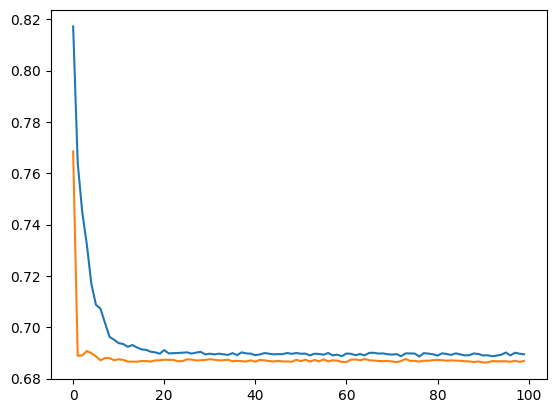

In [54]:
import matplotlib.pyplot as plt

plt.plot(network.history['loss'])
plt.plot(network.history['val_loss'])

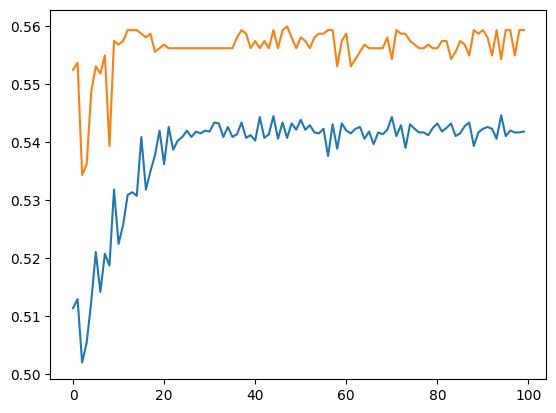

In [55]:
plt.plot(network.history['accuracy'])
plt.plot(network.history['val_accuracy'])

# New Section